# Import statements
Following packages are necessary:

In [1]:
import random
import utils
import os
import imageio
import json
from simplegen import SIMPLESequence

import tensorflow as tf
import numpy as np
import tensorflow.keras.backend as kb
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint

from unet import UNet
from unet import preprocess_input as pre_une

from matplotlib import pyplot as plt

# Checks
The version of tensorflow as well as the GPU support are checked.

In [2]:
print(tf.__version__)
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.config.experimental.get_visible_devices('GPU')

2.0.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

physical_devices = tf.config.experimental.list_physical_devices('GPU')
try:
  # Disable all GPUS
  tf.config.experimental.set_visible_devices([], 'GPU')
  visible_devices = tf.config.experimental.get_visible_devices()
  for device in visible_devices:
    assert device.device_type != 'GPU'
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

print(tf.config.experimental.get_visible_devices('GPU'))
print(tf.config.experimental.get_visible_devices('CPU'))

# Functionality
Necessary funcionality is added here

In [3]:
def plot_cube(img, x, y, val):
    
    img[y][x] = val
    img[y][x-1] = val
    img[y][x+1] = val
    img[y-1][x] = val
    img[y-1][x-1] = val
    img[y-1][x+1] = val
    img[y+1][x] = val
    img[y+1][x-1] = val
    img[y+1][x+1] = val  

# 6.4) Supervised Euclidean for SIMPLEA
A U-Net is trained here to predict a displacement field and the euclidean distance is taken as error.

# Data
Import training images

In [4]:
store_path = 'experiments/6_4_euclidean'

path_fixed = r'D:\Julian\data\SIMPLEA\train\0_f.json'
path_train = r'D:\Julian\data\SIMPLEA\train'
path_validation = r'D:\Julian\data\SIMPLEA\validation'
path_test = r'D:\Julian\data\SIMPLEA\test'

width = 224
height = 224

# Seeding
Seeds are set to ensure reproducible training.

In [5]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# Network
A U-Net based network is instantiated with keras to run a semantic segmentation.

In [6]:
model = UNet(filters=32, layers=4, activation='linear', classes=2, input_shape=(224, 224, 1))

# Training Preparation
Prepare the settings for training the model.

In [7]:
train_gen = SIMPLESequence(path_train, path_fixed,
                           batch_size=4,
                           preprocess_input=pre_une,
                           shuffle=True)

validation_gen = SIMPLESequence(path_validation, path_fixed,
                                batch_size=4,
                                preprocess_input=pre_une)

logger = CSVLogger(store_path + "/log")
checker = ModelCheckpoint(store_path + "/weights.{epoch:02d}.hdf5",
                          period=10)
callbacks = [logger, checker]

model.compile(optimizer='adam', loss = utils.msed_loss)

# Training
Run the training.

In [8]:
model.fit(train_gen,
          epochs=100,
          callbacks=callbacks,
          validation_data=validation_gen,
          validation_freq=1,
          #use_multiprocessing=True,
          workers=10,
          max_queue_size=32)

Train for 840 steps, validate for 180 steps
Epoch 1/100


C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shap

840/840 [==============================] - 65s 78ms/step - loss: 1000.0686 - val_loss: 779.0770
Epoch 2/100
840/840 [==============================] - 55s 65ms/step - loss: 770.5267 - val_loss: 785.7555
Epoch 3/100
840/840 [==============================] - 56s 67ms/step - loss: 640.2238 - val_loss: 203.9792
Epoch 4/100
840/840 [==============================] - 56s 66ms/step - loss: 110.0115 - val_loss: 96.7095
Epoch 5/100
840/840 [==============================] - 54s 65ms/step - loss: 71.9209 - val_loss: 65.6165
Epoch 6/100
840/840 [==============================] - 56s 67ms/step - loss: 55.8573 - val_loss: 70.3511
Epoch 7/100
840/840 [==============================] - 55s 65ms/step - loss: 49.1558 - val_loss: 45.4132
Epoch 8/100
840/840 [==============================] - 57s 68ms/step - loss: 44.7916 - val_loss: 47.3470
Epoch 9/100
840/840 [==============================] - 54s 65ms/step - loss: 38.6117 - val_loss: 44.6555
Epoch 10/100
840/840 [==============================] - 57s

Epoch 79/100
840/840 [==============================] - 65s 77ms/step - loss: 1.2380 - val_loss: 24.7611
Epoch 80/100
840/840 [==============================] - 66s 78ms/step - loss: 1.0668 - val_loss: 26.5021
Epoch 81/100
840/840 [==============================] - 65s 77ms/step - loss: 1.9711 - val_loss: 27.2345
Epoch 82/100
840/840 [==============================] - 65s 78ms/step - loss: 1.5429 - val_loss: 26.8496
Epoch 83/100
840/840 [==============================] - 65s 77ms/step - loss: 0.7263 - val_loss: 25.4412
Epoch 84/100
840/840 [==============================] - 64s 76ms/step - loss: 0.5927 - val_loss: 25.1284
Epoch 85/100
840/840 [==============================] - 63s 75ms/step - loss: 1.2762 - val_loss: 24.8073
Epoch 86/100
840/840 [==============================] - 62s 74ms/step - loss: 1.3195 - val_loss: 25.8591
Epoch 87/100
840/840 [==============================] - 62s 74ms/step - loss: 1.6377 - val_loss: 27.4232
Epoch 88/100
840/840 [==============================] -

# Evaluation
Evaluate the trained network

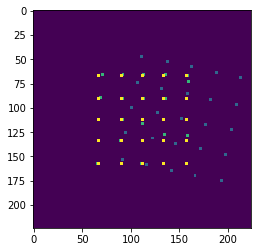

In [9]:
X, y = validation_gen[1]

y_pred = model.predict(X)

u_x = y_pred[0,:,:,0]
u_y = y_pred[0,:,:,1]

plt.imshow(y_pred[0,:,:,0], cmap="gray")

plt.imsave(store_path + "/u_x.png", u_x, cmap="gray")
plt.imsave(store_path + "/u_y.png", u_y, cmap="gray")

u_x.dump(store_path + "/u_x")
u_y.dump(store_path + "/u_y")

warp = np.zeros((width, height))

for index in range(0,25):
    x_pos = int(y[0, index, 0, 0])
    y_pos = int(y[0, index, 1, 0])
    
    plot_cube(warp, x_pos, y_pos, 1) #blue
    
    ux_field = y_pred[0,:,:,0]
    uy_field = y_pred[0,:,:,1]
    
    ux = ux_field[y_pos][x_pos]
    uy = uy_field[y_pos][x_pos]
    
    x_pos = int(round(x_pos + ux))
    y_pos = int(round(y_pos + uy))
            
    plot_cube(warp, x_pos, y_pos, 2) #green    
    
    x_pos = int(y[0, index, 0, 1])
    y_pos = int(y[0, index, 1, 1])
    
    plot_cube(warp, x_pos, y_pos, 3) #yellow    
    
plt.imshow(warp)
plt.imsave(store_path + "/warp.png", warp)

# 6.5) Supervised Euclidean for SIMPLEN
A U-Net is trained here to predict a displacement field and the euclidean distance is taken as error.

# Data
Import training images

In [10]:
store_path = 'experiments/6_5_euclidean'

path_fixed = r'D:\Julian\data\SIMPLEN\train\0_f.json'
path_train = r'D:\Julian\data\SIMPLEN\train'
path_validation = r'D:\Julian\data\SIMPLEN\validation'
path_test = r'D:\Julian\data\SIMPLEN\test'

width = 224
height = 224

# Seeding
Seeds are set to ensure reproducible training.

In [11]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# Network
A U-Net based network is instantiated with keras to run a semantic segmentation.

In [12]:
model = UNet(filters=32, layers=4, activation='linear', classes=2, input_shape=(224, 224, 1))

# Training Preparation
Prepare the settings for training the model.

In [13]:
train_gen = SIMPLESequence(path_train, path_fixed,
                           batch_size=4,
                           preprocess_input=pre_une,
                           shuffle=True)

validation_gen = SIMPLESequence(path_validation, path_fixed,
                                batch_size=4,
                                preprocess_input=pre_une)

logger = CSVLogger(store_path + "/log")
checker = ModelCheckpoint(store_path + "/weights.{epoch:02d}.hdf5",
                          period=10)
callbacks = [logger, checker]

model.compile(optimizer='adam', loss = utils.msed_loss)

# Training
Run the training.

In [14]:
model.fit(train_gen,
          epochs=100,
          callbacks=callbacks,
          validation_data=validation_gen,
          validation_freq=1,
          #use_multiprocessing=True,
          workers=10,
          max_queue_size=32)

Train for 840 steps, validate for 180 steps
Epoch 1/100


C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shap

840/840 [==============================] - 74s 88ms/step - loss: 804.5185 - val_loss: 687.5201
Epoch 2/100
840/840 [==============================] - 62s 74ms/step - loss: 647.8115 - val_loss: 661.3540
Epoch 3/100
840/840 [==============================] - 62s 74ms/step - loss: 630.6889 - val_loss: 548.5919
Epoch 4/100
840/840 [==============================] - 64s 76ms/step - loss: 228.7215 - val_loss: 129.3611
Epoch 5/100
840/840 [==============================] - 63s 75ms/step - loss: 74.6355 - val_loss: 69.6957
Epoch 6/100
840/840 [==============================] - 64s 76ms/step - loss: 51.9818 - val_loss: 55.6849
Epoch 7/100
840/840 [==============================] - 62s 74ms/step - loss: 45.6530 - val_loss: 74.7533
Epoch 8/100
840/840 [==============================] - 65s 77ms/step - loss: 38.4881 - val_loss: 42.3087
Epoch 9/100
840/840 [==============================] - 63s 75ms/step - loss: 32.9382 - val_loss: 53.3336
Epoch 10/100
840/840 [==============================] - 65s

Epoch 79/100
840/840 [==============================] - 61s 73ms/step - loss: 0.8302 - val_loss: 27.2190
Epoch 80/100
840/840 [==============================] - 61s 73ms/step - loss: 1.6088 - val_loss: 18.7437
Epoch 81/100
840/840 [==============================] - 61s 72ms/step - loss: 0.7429 - val_loss: 18.4543
Epoch 82/100
840/840 [==============================] - 62s 73ms/step - loss: 0.7867 - val_loss: 18.0485
Epoch 83/100
840/840 [==============================] - 62s 74ms/step - loss: 0.9716 - val_loss: 18.9572
Epoch 84/100
840/840 [==============================] - 61s 73ms/step - loss: 0.6137 - val_loss: 17.9031
Epoch 85/100
840/840 [==============================] - 63s 75ms/step - loss: 0.8308 - val_loss: 18.6511
Epoch 86/100
840/840 [==============================] - 61s 73ms/step - loss: 1.2129 - val_loss: 22.3935
Epoch 87/100
840/840 [==============================] - 62s 74ms/step - loss: 1.1719 - val_loss: 19.4210
Epoch 88/100
840/840 [==============================] -

# Evaluation
Evaluate the trained network

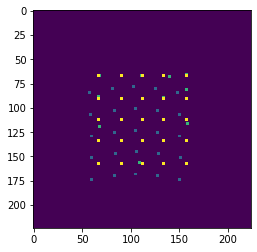

In [15]:
X, y = validation_gen[1]

y_pred = model.predict(X)

u_x = y_pred[0,:,:,0]
u_y = y_pred[0,:,:,1]

plt.imshow(y_pred[0,:,:,0], cmap="gray")

plt.imsave(store_path + "/u_x.png", u_x, cmap="gray")
plt.imsave(store_path + "/u_y.png", u_y, cmap="gray")

u_x.dump(store_path + "/u_x")
u_y.dump(store_path + "/u_y")

warp = np.zeros((width, height))

for index in range(0,25):
    x_pos = int(y[0, index, 0, 0])
    y_pos = int(y[0, index, 1, 0])
    
    plot_cube(warp, x_pos, y_pos, 1) #blue
    
    ux_field = y_pred[0,:,:,0]
    uy_field = y_pred[0,:,:,1]
    
    ux = ux_field[y_pos][x_pos]
    uy = uy_field[y_pos][x_pos]
    
    x_pos = int(round(x_pos + ux))
    y_pos = int(round(y_pos + uy))
            
    plot_cube(warp, x_pos, y_pos, 2) #green    
    
    x_pos = int(y[0, index, 0, 1])
    y_pos = int(y[0, index, 1, 1])
    
    plot_cube(warp, x_pos, y_pos, 3) #yellow    
    
plt.imshow(warp)
plt.imsave(store_path + "/warp.png", warp)

# 6.6) Supervised Euclidean for SIMPLED
A U-Net is trained here to predict a displacement field and the euclidean distance is taken as error.

# Data
Import training images

In [4]:
store_path = 'experiments/6_6_euclidean'

path_fixed = r'D:\Julian\data\SIMPLED\train\0_f.json'
path_train = r'D:\Julian\data\SIMPLED\train'
path_validation = r'D:\Julian\data\SIMPLED\validation'
path_test = r'D:\Julian\data\SIMPLED\test'

width = 224
height = 224

# Seeding
Seeds are set to ensure reproducible training.

In [5]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# Network
A U-Net based network is instantiated with keras to run a semantic segmentation.

In [6]:
model = UNet(filters=32, layers=4, activation='linear', classes=2, input_shape=(224, 224, 1))

# Training Preparation
Prepare the settings for training the model.

In [7]:
train_gen = SIMPLESequence(path_train, path_fixed,
                           batch_size=4,
                           preprocess_input=pre_une,
                           shuffle=True)

validation_gen = SIMPLESequence(path_validation, path_fixed,
                                batch_size=4,
                                preprocess_input=pre_une)

logger = CSVLogger(store_path + "/log")
checker = ModelCheckpoint(store_path + "/weights.{epoch:02d}.hdf5",
                          period=10)
callbacks = [logger, checker]

model.compile(optimizer='adam', loss = utils.msed_loss)

# Training
Run the training.

In [9]:
model.fit(train_gen,
          epochs=100,
          callbacks=callbacks,
          validation_data=validation_gen,
          validation_freq=1,
          #use_multiprocessing=True,
          workers=10,
          max_queue_size=32)

Train for 840 steps, validate for 180 steps
Epoch 1/100


C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shap

840/840 [==============================] - 79s 94ms/step - loss: 779.6459 - val_loss: 641.4883
Epoch 2/100
840/840 [==============================] - 61s 72ms/step - loss: 611.1755 - val_loss: 568.3593
Epoch 3/100
840/840 [==============================] - 61s 72ms/step - loss: 265.6559 - val_loss: 108.7318
Epoch 4/100
840/840 [==============================] - 63s 75ms/step - loss: 80.8760 - val_loss: 77.2299
Epoch 5/100
840/840 [==============================] - 59s 70ms/step - loss: 64.0341 - val_loss: 63.1243
Epoch 6/100
840/840 [==============================] - 61s 72ms/step - loss: 57.6748 - val_loss: 58.6149
Epoch 7/100
840/840 [==============================] - 61s 72ms/step - loss: 47.8577 - val_loss: 54.1050
Epoch 8/100
840/840 [==============================] - 61s 72ms/step - loss: 40.7174 - val_loss: 47.9560
Epoch 9/100
840/840 [==============================] - 59s 71ms/step - loss: 36.8257 - val_loss: 40.5744
Epoch 10/100
840/840 [==============================] - 61s 7

# Evaluation
Evaluate the trained network

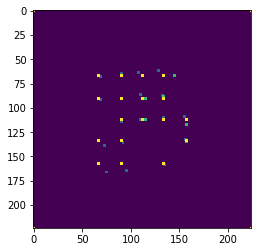

In [14]:
X, y = validation_gen[1]

y_pred = model.predict(X)

u_x = y_pred[0,:,:,0]
u_y = y_pred[0,:,:,1]

plt.imshow(y_pred[0,:,:,0], cmap="gray")

plt.imsave(store_path + "/u_x.png", u_x, cmap="gray")
plt.imsave(store_path + "/u_y.png", u_y, cmap="gray")

u_x.dump(store_path + "/u_x")
u_y.dump(store_path + "/u_y")

warp = np.zeros((width, height))

for index in range(0,25):
    x_pos = int(y[0, index, 0, 0])
    y_pos = int(y[0, index, 1, 0])
    
    plot_cube(warp, x_pos, y_pos, 1) #blue
    
    ux_field = y_pred[0,:,:,0]
    uy_field = y_pred[0,:,:,1]
    
    ux = ux_field[y_pos][x_pos]
    uy = uy_field[y_pos][x_pos]
    
    x_pos = int(round(x_pos + ux))
    y_pos = int(round(y_pos + uy))
            
    plot_cube(warp, x_pos, y_pos, 2) #green    
    
    x_pos = int(y[0, index, 0, 1])
    y_pos = int(y[0, index, 1, 1])
    
    plot_cube(warp, x_pos, y_pos, 3) #yellow    
    
plt.imshow(warp)
plt.imsave(store_path + "/warp.png", warp)